In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [52]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

**Importing the dataset**

In [5]:
data = pd.read_csv("Social_Network_Ads.csv")

In [6]:
data = pd.concat([data,pd.get_dummies(data["Gender"],prefix = "Gender")],axis = 1)
data.drop(["Gender"],axis = 1,inplace = True)
data

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


**Splitting the dataset into the Training set and Test set**

In [34]:
X = data[["Age","EstimatedSalary","Gender_Female","Gender_Male"]]
Y = data["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 5)
X_train

,Age,EstimatedSalary,Gender_Female,Gender_Male
249,35,97000,1,0
42,35,108000,0,1
297,43,112000,1,0
127,26,32000,0,1
56,23,48000,1,0
...,...,...,...,...
73,33,113000,1,0
118,40,59000,0,1
189,28,32000,0,1
206,55,130000,1,0


**Feature Scaling**

In [35]:
std_scaler = StandardScaler()
tr_Xtrain = std_scaler.fit_transform(X_train[["Age","EstimatedSalary"]])
tr_Xtest = std_scaler.transform(X_test[["Age","EstimatedSalary"]])
tr_Xtrain.shape

(320, 2)

In [36]:
tr_Xtrain = np.concatenate((tr_Xtrain,X_train.iloc[:,2:]),axis = 1)
tr_Xtest =  np.concatenate((tr_Xtest,X_test.iloc[:,2:]),axis = 1)
tr_Xtrain.shape

(320, 4)

**Fitting SVM to the Training set**

In [41]:
svc = SVC()
param = {"kernel" : ["linear", "poly", "rbf", "sigmoid"],"degree":[2,3,4,5,6],"class_weight":[None,"balanced"],
         "gamma":["scale","auto"]}

gd = GridSearchCV(svc,param)
gd.fit(tr_Xtrain,y_train)
bestParameters = gd.best_params_

In [42]:
bestParameters

{'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [46]:
final_model = SVC(class_weight = 'balanced', gamma= 'scale', kernel= 'rbf')
final_model.fit(tr_Xtrain,y_train)

SVC(class_weight='balanced')

**Predicting the Test set results**

In [49]:
final_model.predict(tr_Xtest)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [50]:
final_model.score(tr_Xtest,y_test)

0.9375

**Making the Confusion Matrix**

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


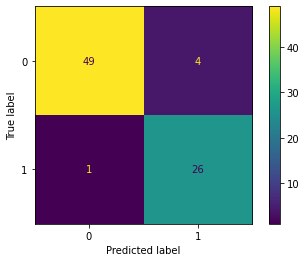

In [51]:
plot_confusion_matrix(final_model, tr_Xtest, y_test)

**Visualising the Training set results**

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


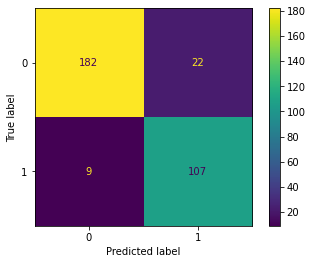

In [58]:
plot_confusion_matrix(final_model, tr_Xtrain, y_train)

0.903125


([<matplotlib.patches.Wedge at 0x1c68eab68b0>,
 [Text(-1.0494488303019651, 0.329631843998479, 'Correctly Classified %'),
  Text(1.0494488148707835, -0.3296318931267241, 'Incorrectly Classified %')],
 [Text(-0.5724266347101626, 0.17979918763553399, '90.3%'),
  Text(0.5724266262931546, -0.1797992144327586, '9.7%')])

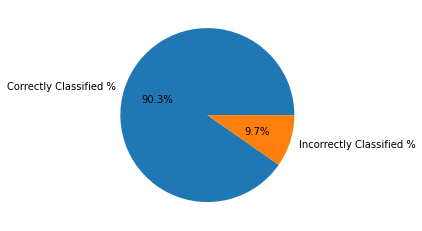

In [61]:
train_score = final_model.score(tr_Xtrain,y_train)
print(train_score)
plt.pie([100*train_score,100 - 100*train_score],labels = ["Correctly Classified %","Incorrectly Classified %"],autopct='%1.1f%%')

**Visualising the Test set results**

0.9375


([<matplotlib.patches.Wedge at 0x1c68eb4c670>,
 [Text(-1.0788638084435536, 0.21459935421774148, 'Correctly Classified %'),
  Text(1.0788638084435533, -0.21459935421774162, 'Incorrectly Classified %')],
 [Text(-0.5884711682419382, 0.11705419320967717, '93.8%'),
  Text(0.5884711682419381, -0.11705419320967722, '6.2%')])

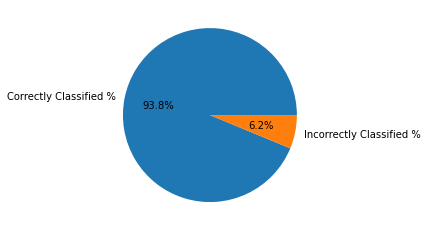

In [63]:
test_score = final_model.score(tr_Xtest,y_test)
print(test_score)
plt.pie([100*test_score,100 - 100*test_score],labels = ["Correctly Classified %","Incorrectly Classified %"],autopct='%1.1f%%')